# Quem Morre no Titanic

## Imports

In [1]:
# Necessary imports
import pandas as pd
import seaborn as sns

In [2]:
# Train data
train = pd.read_csv('train.csv')

# Test data
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Analisys

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleanning

### Pclass

In [7]:
# the Pclass is already a categorical variable, im going to change it to a integer
train['Pclass'] = train['Pclass'].astype('category')

In [8]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


### Name

In [9]:
# The Name column is not useful, but the title is, so im going to extract it
train.Name = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [10]:
# Mr, Miss, Mrs and Master are the most common titles, so im going to group the rest of the titles in a new category
train.Name = train.Name.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Other')

In [11]:
# Now i pass this names to integers
train.Name = train.Name.map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4})

In [12]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Name', values = 'Ticket' ,aggfunc ='count'))

Name        0    1   2   3   4
Survived                      
0         436   55  26  17  15
1          81  127  99  23  12


### Sex

In [13]:
# The sex column is already a categorical variable, im going to change it to a integer
train.Sex = train.Sex.apply(lambda x: 0 if x == "male" else 1)

In [14]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex         0    1
Survived          
0         468   81
1         109  233


### Age

In [15]:
# The age is a float, im going to change it to a integer and fill the missing values with the mean and discretize it in 5 categories
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Age'] = train['Age'].astype(int)
train['Age'] = train['Age'].apply(lambda x: 0 if x < 16 else 1 if x < 32 else 2 if x < 48 else 3 if x < 64 else 4)

In [16]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Age', values = 'Ticket' ,aggfunc ='count'))

Age        0    1    2   3   4
Survived                      
0         34  345  118  40  12
1         49  177   79  36   1


### Fare

In [17]:
# The fare is a float, im going to change it to a integer and fill the missing values with the mean and discretize it in 5 categories
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
train['Fare'] = train['Fare'].astype(int)
train['Fare'] = train['Fare'].apply(lambda x: 0 if x < 7.91 else 1 if x < 14.454 else 2 if x < 31 else 3)

In [18]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Fare', values = 'Ticket' ,aggfunc ='count'))

Fare        0    1    2    3
Survived                    
0         189  154  112   94
1          52   62   97  131


### Cabin

In [19]:
# For the cabin column, i will get the fist letter of the cabin and fill the missing values with a new category 'N'
train.Cabin = train.Cabin.apply(lambda x: 'N' if pd.isna(x) else x[0])

In [20]:
# Agrerating the cabins A, F, G and T in a new category A, because they are small
train.Cabin = train.Cabin.apply(lambda x: 'A' if x in ['A', 'F', 'G', 'T'] else x)
# And for last change the cabin letters to integers
train.Cabin = train.Cabin.map({'N': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5})

In [21]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Ticket' ,aggfunc ='count'))

Cabin       0   1   2   3   4   5
Survived                         
0         481  24  12   8   8  16
1         206  35  35  25  24  17


### Embarked

In [22]:
# The embarked column is already a categorical variable, im going to change it to a integer and fill the missing values with the most common
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])
train.Embarked = train.Embarked.map({'S': 0, 'C': 1, 'Q': 2})

In [23]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked    0   1   2
Survived             
0         427  75  47
1         219  93  30


### Unecessary Data

In [24]:
# The ticket column is not useful, so im going to drop it, as well as the passengerId
train = train.drop(['Ticket', 'PassengerId'], axis = 1)

In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,0,1,1,0,0,0,0
1,1,1,2,1,2,1,0,3,1,1
2,1,3,1,1,1,0,0,0,0,0
3,1,1,2,1,2,1,0,3,1,0
4,0,3,0,0,2,0,0,1,0,0


## Model

As all the data is already cleaned, we will pass into the model trainnig

We choosed to train two main models and, afterwards, choose the best for the answer. As we are making a classifier, we choosed to make a Suport Vector Classifier and a Naive Bayes, as they are one of the basics classifiers

In [26]:
# We are going to use the Gaussian Naive Bayes model, because it is suitable for continuous and discrete variables. We will also use the Support Vector Machine model, because it is suitable for binary classification and for non-linear data.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
# We are going to use the accuracy score to evaluate the models
from sklearn.metrics import accuracy_score

# We are going to use the train_test_split function to split the train data in train and test data
from sklearn.model_selection import train_test_split

# We are going to use the cross_val_score function to evaluate the models
from sklearn.model_selection import cross_val_score

In [28]:
# Dividing the train data in train and test data
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.3, random_state = 101)

### Naive Bayes model

In [29]:
# Naive Bayes model
GNBModel = GaussianNB()

# Fitting the model
GNBModel.fit(X_train, y_train)

# Predicting the test data
GNBPredictions = GNBModel.predict(X_test)

# Evaluating the model
print('Accuracy score: ', accuracy_score(y_test, GNBPredictions))

Accuracy score:  0.7761194029850746


In [30]:
# Cross validation
GNBCrossVal = cross_val_score(GNBModel, train.drop('Survived', axis = 1), train['Survived'], cv = 10, scoring = 'accuracy')

print('Cross validation score: ', GNBCrossVal.mean())

Cross validation score:  0.7889887640449438


### SVC model

In [31]:
# SVC model
SVCModel = SVC()

# Fitting the model
SVCModel.fit(X_train, y_train)

# Predicting the test data
SVCPredictions = SVCModel.predict(X_test)

# Evaluating the model
print('Accuracy score: ', accuracy_score(y_test, SVCPredictions))

Accuracy score:  0.8134328358208955


In [32]:
# Cross validation
SVCScore = cross_val_score(SVCModel, train.drop('Survived', axis = 1), train['Survived'], cv = 10, scoring = 'accuracy')

print('Cross validation score: ', SVCScore.mean())

Cross validation score:  0.8316354556803995


### Confusion Matrix

In [33]:
# Analysing with confusion matrix
from sklearn.metrics import confusion_matrix

<Axes: >

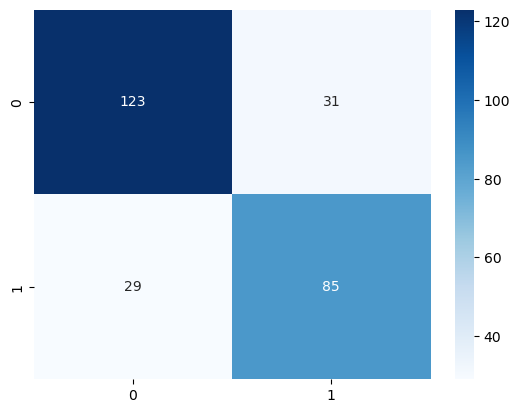

In [34]:
# Naive Bayes model

# Confusion matrix
GNBConfusionMatrix = confusion_matrix(y_test, GNBPredictions)

# Plotting the confusion matrix
sns.heatmap(GNBConfusionMatrix, annot = True, cmap = 'Blues', fmt = 'g')

<Axes: >

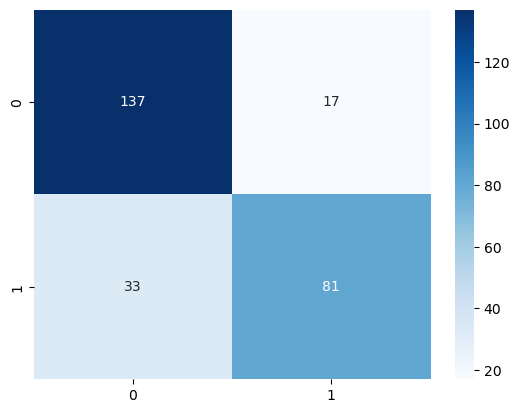

In [35]:
# SVC model

# Confusion matrix
SVCConfusionMatrix = confusion_matrix(y_test, SVCPredictions)

# Plotting the confusion matrix
sns.heatmap(SVCConfusionMatrix, annot = True, cmap = 'Blues', fmt = 'g')

## Generating The Final Result

In [36]:
# As the SVC model has a better accuracy score and cross validation score, we are going to use it to predict the test data

In [37]:
# First we need to prepare the test data
test['Pclass'] = test['Pclass'].astype('category')

test.Name = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test.Name = test.Name.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Other')
test.Name = test.Name.map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4})

test.Sex = test.Sex.apply(lambda x: 0 if x == "male" else 1)

test.Age = test.Age.fillna(test.Age.mean())
test.Age = test.Age.astype(int)
test.Age = test.Age.apply(lambda x: 0 if x < 16 else 1 if x < 32 else 2 if x < 48 else 3 if x < 64 else 4)

test.Fare = test.Fare.fillna(test.Fare.mean())
test.Fare = test.Fare.astype(int)
test.Fare = test.Fare.apply(lambda x: 0 if x < 7.91 else 1 if x < 14.454 else 2 if x < 31 else 3)

test.Cabin = test.Cabin.apply(lambda x: 'N' if pd.isna(x) else x[0])
test.Cabin = test.Cabin.apply(lambda x: 'A' if x in ['A', 'F', 'G', 'T'] else x)
test.Cabin = test.Cabin.map({'N': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5})

test.Embarked = test.Embarked.fillna(test.Embarked.mode()[0])
test.Embarked = test.Embarked.map({'S': 0, 'C': 1, 'Q': 2})

test = test.drop(['Ticket', 'PassengerId'], axis = 1)

In [38]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,0,2,0,0,0,0,2
1,3,2,1,2,1,0,0,0,0
2,2,0,0,3,0,0,1,0,2
3,3,0,0,1,0,0,1,0,0
4,3,2,1,1,1,1,1,0,0


In [40]:
# Predicting the test data
testPredictions = SVCModel.predict(test)

# Preparing the submission file
submission = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Survived': testPredictions})

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
# Saving the submission file
submission.to_csv('submission.csv', index = False)